In [2]:
import xarray as xr
import pandas as pd

# GFS dataset
url = 'https://nomads.ncep.noaa.gov/dods/gefs/gefs20240207/gefs_pgrb2bp5_all_18z'

# Function to retrieve and convert data to Imperial units
def retrieve_and_convert(url, lat, lon, start_date):
    ds = xr.open_dataset(url, engine="netcdf4")
    # Spatial selection
    ds_nearest = ds.sel(lat=lat, lon=lon, method='nearest')
    # Calculate the end date
    end_date = start_date + pd.Timedelta(days=4)
    # Temporal selection
    ds_time_filtered = ds_nearest.sel(time=slice(start_date, end_date))
    # Apply unit coversion
    ds_time_filtered['aptmp2m'] = (ds_time_filtered['aptmp2m'] - 273.15) * 9/5 + 32
    ds_time_filtered['gustsfc'] = ds_time_filtered['gustsfc'] * 2.23694
    ds_time_filtered['presmsl'] = ds_time_filtered['presmsl'] / 100
    ds_time_filtered['vissfc'] = ds_time_filtered['vissfc'] / 1609.34
    return ds_time_filtered

# Chicago coordinates
latitude = 41.9
longitude = -87.64
start_date = pd.Timestamp('2024-02-07')

converted_data = retrieve_and_convert(url, latitude, longitude, start_date)

# Summary after loading
print(converted_data)

C:\Users\jonny\anaconda3\Lib\site-packages\xarray\coding\times.py:154: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset>
Dimensions:         (ens: 31, time: 14, lev: 31)
Coordinates:
  * ens             (ens) float64 1.0 2.0 3.0 4.0 5.0 ... 28.0 29.0 30.0 31.0
  * time            (time) datetime64[ns] 2024-02-07T18:00:00 ... 2024-02-11
  * lev             (lev) float64 1e+03 975.0 950.0 925.0 ... 5.0 3.0 2.0 1.0
    lat             float64 42.0
    lon             float64 0.0
Data variables: (12/279)
    absvprs         (ens, time, lev) float32 ...
    no4lftxsfc      (ens, time) float32 ...
    no5wavh500mb    (ens, time) float32 ...
    acpcpsfc        (ens, time) float32 ...
    albdosfc        (ens, time) float32 ...
    aptmp2m         (ens, time) float32 52.54 44.65 47.65 ... 52.92 38.21 34.05
    ...              ...
    vwshneg1p5pv    (ens, time) float32 ...
    vwsh2pv         (ens, time) float32 ...
    vwshneg2pv      (ens, time) float32 ...
    vwshtrop        (ens, time) float32 ...
    watrsfc         (ens, time) float32 ...
    wiltsfc         (ens, time) float32 ...
Attr

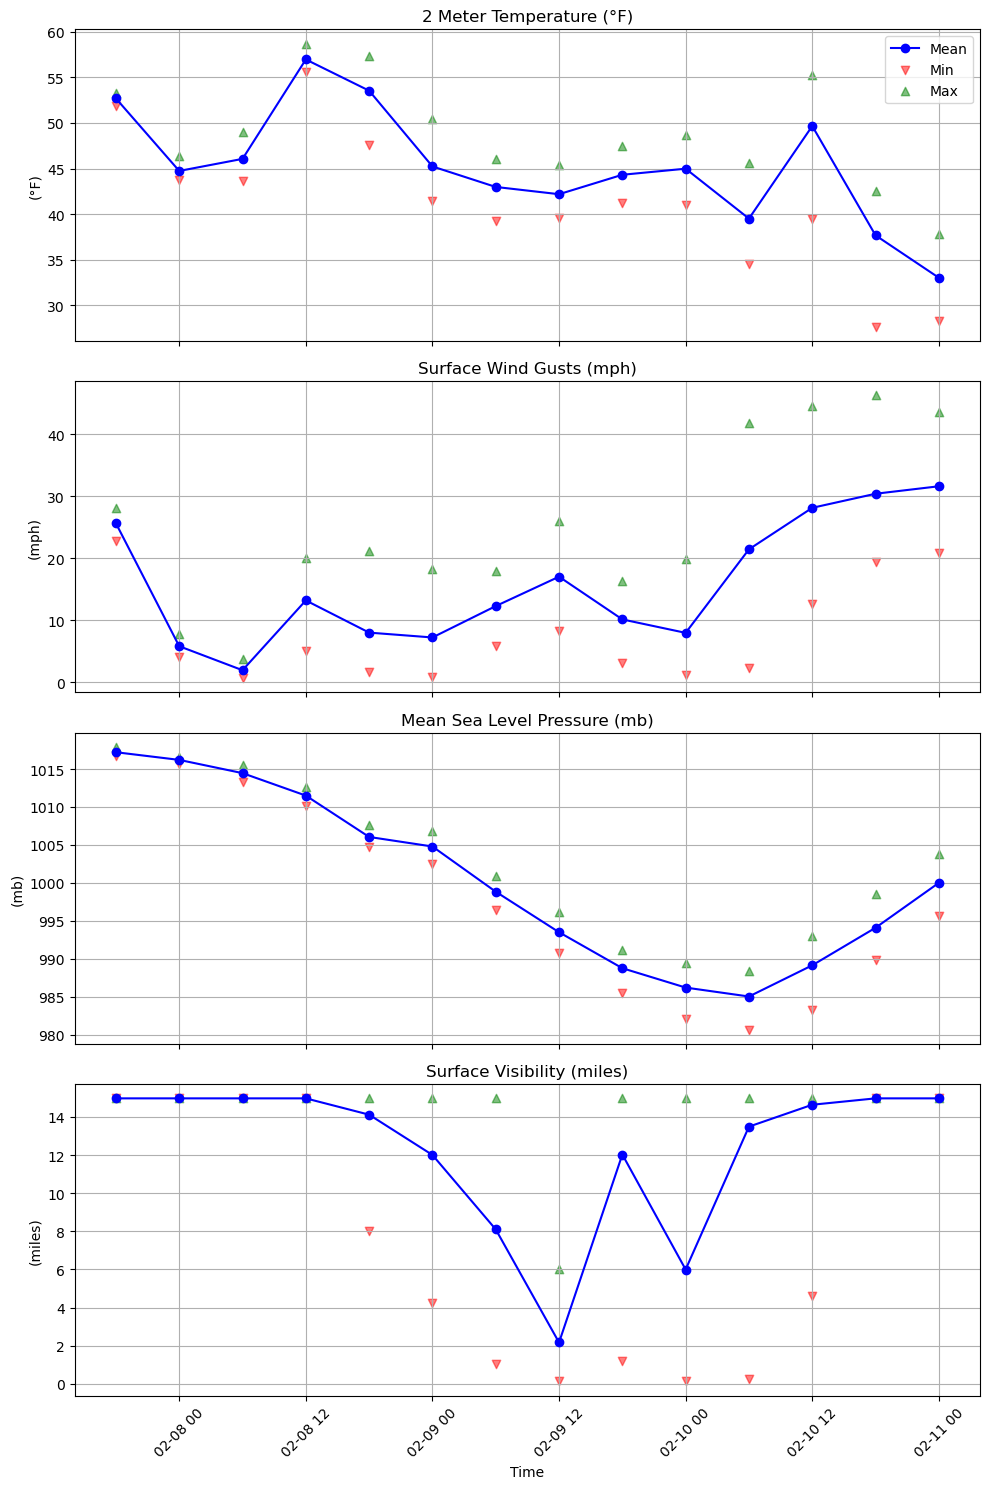

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Data plot function
def plot_ensemble_variables(data):
    fig, axs = plt.subplots(4, 1, figsize=(10, 15), sharex=True)
    
    variables = ['aptmp2m', 'gustsfc', 'presmsl', 'vissfc']
    titles = ['2 Meter Temperature (°F)', 'Surface Wind Gusts (mph)', 
              'Mean Sea Level Pressure (mb)', 'Surface Visibility (miles)']
    
    time_range = data['time'].values
    
    for i, var in enumerate(variables):
        # Calculate min, max, and mean values across ensemble members
        mean_values = data[var].mean(dim='ens').values
        min_values = data[var].min(dim='ens').values
        max_values = data[var].max(dim='ens').values
        # Plotting
        axs[i].plot(time_range, mean_values, label='Mean', color='blue', marker='o', linestyle='-')
        axs[i].scatter(time_range, min_values, color='red', label='Min', alpha=0.5, marker='v')
        axs[i].scatter(time_range, max_values, color='green', label='Max', alpha=0.5, marker='^')
        # Titles and labels
        axs[i].set_title(titles[i])
        axs[i].set_ylabel(titles[i].split(" ")[-1])
        axs[i].grid(True)
        
        # Legend
        if i == 0:
            axs[i].legend(loc='upper right')
            
    # Set labels
    plt.xlabel('Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_ensemble_variables(converted_data)